# regresión lineal simple en python
## el paquete statsmodel para regresión lineal

In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv("Advertising.csv")

In [38]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [39]:
import statsmodels.formula.api as smf

In [40]:
lm = smf.ols(formula="Sales~TV", data=data).fit() ##predecir las ventas en función de la TV, utilizando como dataset el dataset al que llamamos "data"

In [41]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

el modelo lineal predictivo sería:
Sales = 7.032594 + 0.047537 * TV

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 23 Mar 2019   Prob (F-statistic):           1.47e-42
Time:                        16:47:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prob (F-statistic) es el "p-valor general del modelo"
### F-statistic es el "estadistico F"
### R-squared es el "R2"
### p>|t| es el "p-valor individual de la variable"

In [43]:
## predicciones de "Sales" con respecto a la columna "TV" 
prediccion_sales = lm.predict(pd.DataFrame(data["TV"])) ## se pasa como parámetro a la función "lm.predict()" solamente la columna TV 
prediccion_sales 

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

In [44]:
import matplotlib.pyplot as plt

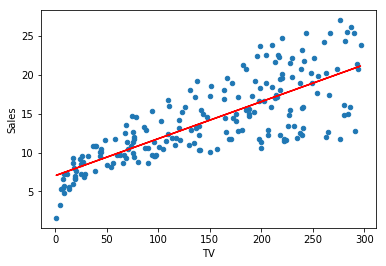

In [45]:
%matplotlib inline
data.plot(kind="scatter", x="TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), prediccion_sales, c="red")

la linea roja es el modelo que se obtuvo
los puntos de color azul son los datos originales que presenta el dataset

In [46]:
## se añade al dataset la columna de las predicciones del modelo.
data["prediccion_sales"] =  prediccion_sales

In [47]:
data.head()

,TV,Radio,Newspaper,Sales,prediccion_sales
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [48]:
## se añade al dataset la columna de "RSE" error estándar residual
data["RSE"] = (data["Sales"] - data["prediccion_sales"])**2

##suma de los cuadrados de los errores
SSD = sum(data["RSE"])
print("la suma de los cuadrados de la diferencia es ",SSD)

## error estándar residual
RSE = np.sqrt(SSD/(len(data)-2))
print("error estándar residual es: ",RSE)

## promedio de ventas del dataset original
promedio_ventas = np.mean(data["Sales"])
print("el promedio de ventas del dataset original es: ",promedio_ventas)

##error del modelo
error = RSE/promedio_ventas
print("el error del modelo es: ",error)

la suma de los cuadrados de la diferencia es  2102.5305831313517
error estándar residual es:  3.258656368650463
el promedio de ventas del dataset original es:  14.022500000000003
el error del modelo es:  0.23238768897489478


el error es del 23%, esto quiere decir que el 23% de los datos el modelo no puede explicar,este es un valor alto, hay que reducirlo de alguna manera, la manera es agregar las variables predictivas que faltan.

In [49]:
data.head()

,TV,Radio,Newspaper,Sales,prediccion_sales,RSE
0,230.1,37.8,69.2,22.1,17.970775,17.050503
1,44.5,39.3,45.1,10.4,9.147974,1.567569
2,17.2,45.9,69.3,9.3,7.850224,2.101851
3,151.5,41.3,58.5,18.5,14.234395,18.195390
4,180.8,10.8,58.4,12.9,15.627218,7.437719


# regresión lineal múltiple
## el paquete statsmodel para regresión lineal múltiple

# añadimos la variable predictora "Newspapaer" al modelo anterior

In [50]:
lm2 = smf.ols(formula="Sales~TV+Newspaper",data=data).fit()

In [51]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

el modelo lineal predictivo sería:
Sales = 5.774948 + (0.046901 * TV) + (0.044219 * Newspaper)

In [52]:
lm2.pvalues ativo## los p-valores individuales de las variables son lo suficientemente pequeños y no son ceros, es decir son un buen indicativo como para tener en cuenta las 2 variables para el modelo

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [53]:
lm2.rsquared ## el r2 aumentó un poco, es decir tambien es una buena señal de considerar las 2 variables predictoras.

0.6458354938293271

In [54]:
## predicciones de "Sales" con respecto a la columna "TV" y a la columna "Newspaper"
prediccion_sales = lm2.predict(data[["TV","Newspaper"]]) ##se pasa como parámetro a la funcion "lm.predict" la columna "TV" y la columna "Newspaper" del dataset
prediccion_sales

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
5       9.499445
6       9.510924
7      11.925419
8       6.222518
9      16.083262
10      9.945228
11     16.021516
12      9.805257
13     10.666196
14     17.381579
15     17.278653
16     13.995865
17     21.440393
18      9.829727
19     13.528088
20     18.379490
21     17.948453
22      8.587327
23     17.641044
24      9.506109
25     18.967556
26     13.034296
27     18.048554
28     18.456595
29     10.890326
         ...    
170     8.933646
171    15.586198
172     7.445942
173    14.239121
174    16.785052
175    20.610266
176    18.322864
177    15.314058
178    19.800514
179    14.320051
180    13.486699
181    17.234475
182     9.724113
183    22.438692
184    19.005059
185    16.256398
186    13.493904
187    15.542563
188    19.352307
189     7.686735
190     7.884019
191     9.581306
192     7.978983
193    13.757260
194    13.061376
195     8.176802
196    10.551220
197    14.3594

In [55]:
## se añade al dataset la columna sde la predicciones del modelo.
data["prediccion_sales"] =  prediccion_sales

In [56]:
## se añade al dataset la columna de "RSE" error estándar residual
data["RSE"] = (data["Sales"] - data["prediccion_sales"])**2

##suma de los cuadrados de los errores
SSD = sum(data["RSE"])
print("la suma de los cuadrados de la diferencia es ",SSD)

## error estándar residual
RSE = np.sqrt(SSD/(len(data)-2-1)) ## k=2 porque son 2 variables predictoras
print("error estándar residual es: ",RSE)

## promedio de ventas del dataset original
promedio_ventas = np.mean(data["Sales"])
print("el promedio de ventas del dataset original es: ",promedio_ventas)

##error del modelo
error = RSE/promedio_ventas
print("el error del modelo es: ",error)

la suma de los cuadrados de la diferencia es  1918.5618118968273
error estándar residual es:  3.120719860252885
el promedio de ventas del dataset original es:  14.022500000000003
el error del modelo es:  0.22255089037282116


### CONCLUSIÓN:

### el R2 aumentó un poco
### el p-valor general a subido, lo cual no es bueno.
### el p-valor individual de newspaper es lo suficientemente pequeño y no es cero.
### el error del modelo a mejorado muy poco con respecto al anterior.
#### conclusión: añadir el Newspaper al modelo original mejoró muy poco. Ahora falta agregar la variable de la radio al modelo.

# añadimos la variable predictora "Radio" al modelo anterior 

In [63]:
lm3 = smf.ols(formula="Sales~TV+Radio",data=data).fit()

In [64]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 23 Mar 2019   Prob (F-statistic):           4.83e-98
Time:                        16:53:11   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### En este caso el p-valor general es sumamente pequeño, lo cual es bueno.
### el estadistico F es super grande, lo cual es bueno
### el valor de R2 a mejorado considerablemente, lo cual es bueno.
### el p-valor individual de la variable radio es cero, lo cual es bueno.

In [65]:
## predicciones de "Sales" con respecto a la columna "TV" y a la columna "Radio"
prediccion_sales = lm3.predict(data[["TV","Radio"]]) ##se pasa como parámetro a la funcion "lm.predict" la columna "TV" y la columna "Radio" del dataset
prediccion_sales

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
5      12.512084
6      11.718212
7      12.105516
8       3.709379
9      12.551697
10      7.035860
11     17.256520
12     10.608662
13      8.810951
14     18.444668
15     20.828915
16     12.903865
17     23.241076
18      9.941215
19     14.153846
20     18.121392
21     14.742064
22      6.514172
23     16.544027
24      8.140352
25     15.608021
26     14.967694
27     17.046335
28     19.399541
29      9.159297
         ...    
170     7.389574
171    14.376846
172     7.596578
173    11.960970
174    13.736151
175    24.783526
176    19.964022
177    12.174924
178    16.013844
179    12.378040
180    10.575089
181    13.933696
182     6.564088
183    24.163936
184    18.537949
185    20.779377
186     9.698684
187    17.060279
188    18.620097
189     6.051445
190    12.454978
191     8.405926
192     4.478859
193    18.448761
194    16.463190
195     5.364512
196     8.152375
197    12.7680

In [66]:
## se añade al dataset la columna de la predicciones del modelo.
data["prediccion_sales"] =  prediccion_sales

In [67]:
## se añade al dataset la columna de "RSE" error estándar residual
data["RSE"] = (data["Sales"] - data["prediccion_sales"])**2

##suma de los cuadrados de los errores
SSD = sum(data["RSE"])
print("la suma de los cuadrados de la diferencia es ",SSD)

## error estándar residual
RSE = np.sqrt(SSD/(len(data)-2-1)) ## k=2 porque son 2 variables predictoras
print("error estándar residual es: ",RSE)

## promedio de ventas del dataset original
promedio_ventas = np.mean(data["Sales"])
print("el promedio de ventas del dataset original es: ",promedio_ventas)

##error del modelo
error = RSE/promedio_ventas
print("el error del modelo es: ",error)

la suma de los cuadrados de la diferencia es  556.9139800676182
error estándar residual es:  1.681360912508001
el promedio de ventas del dataset original es:  14.022500000000003
el error del modelo es:  0.11990450436855059


### CONCLUSIÓN:

### En este caso el p-valor general es sumamente pequeño, lo cual es bueno.
### el estadistico F es super grande, lo cual es bueno
### el valor de R2 a mejorado considerablemente, lo cual es bueno.
### el p-valor individual de la variable radio es cero, lo cual es bueno.
### el error del modelo a bajado considerablemente con respecto al anterior.

#### conclusión: añadir la Radio al modelo original mejoró muchisimo.

# añadimos las variable predictoras "TV",Radio","Newspaper" al modelo

In [70]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper",data=data).fit()

In [71]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 23 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        16:57:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
## se añade al dataset la columna sde la predicciones del modelo.
data["prediccion_sales"] =  prediccion_sales

In [74]:
## se añade al dataset la columna de "RSE" error estándar residual
data["RSE"] = (data["Sales"] - data["prediccion_sales"])**2

##suma de los cuadrados de los errores
SSD = sum(data["RSE"])
print("la suma de los cuadrados de la diferencia es ",SSD)

## error estándar residual
RSE = np.sqrt(SSD/(len(data)-3-1)) ## k=3 porque son 3 variables predictoras
print("error estándar residual es: ",RSE)

## promedio de ventas del dataset original
promedio_ventas = np.mean(data["Sales"])
print("el promedio de ventas del dataset original es: ",promedio_ventas)

##error del modelo
error = RSE/promedio_ventas
print("el error del modelo es: ",error)

la suma de los cuadrados de la diferencia es  556.9139800676182
error estándar residual es:  1.6856446415208184
el promedio de ventas del dataset original es:  14.022500000000003
el error del modelo es:  0.12020999404676898


### CONCLUSIÓN:

### el R2 ya no subió.
### el p-valor general a subido, lo cual no es bueno.
### el coeficiente de Newspaper es casi cero, lo cual no es bueno.
### el p-valor individual de la variable Newspaper es muy alto, es casi 1, lo cual no es nada bueno.
### el error del modelo a subido un poco con respecto al anterior. 

### es decir agregar la variable Newspaper va en contra al modelo y es un modelo menos eficaz que el anterior y por lo tanto predice peor que el modelo anterior a pesar de que tiene una variable predictora más con respecto al anterior.